In [2]:
%pip install scikit-learn pandas numpy matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Pandas reads a csv into a DataFrame (rows and columns)
df = pd.read_csv("data/fuel_consumption_co2.csv") 
# Create a subset of the data with the features we want to use
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

### Split up data into training and test sets

In [36]:
msk = np.random.rand(len(cdf)) < 0.8 # Randomly select 80% of the data to train the model
train = cdf[msk]
test = cdf[~msk]

### Model the data - Simple Linear Regression

In [37]:
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit (train_x, train_y)
# The coefficients
print ('Coeficients: ', model.coef_)
print ('Intercept: ',model.intercept_)



Coeficients:  [[38.61466554]]
Intercept:  [127.29436043]


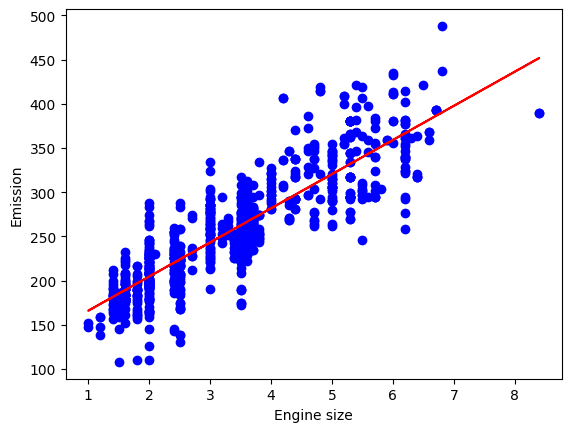

In [38]:
#View the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') # Scatter plot of the data
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r') # Line of best fit
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Test the model and calculate the following to evaluate
* Mean Absolute Error 
* Mean Squared Error (MSE)
* $r^2$ 

In [39]:
# Now use our trained model to predict the test data
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)

# Mean Absolute Error: It is the mean of the absolute value of the errors. 
# This is the easiest of the metrics to understand since it’s just average error.
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

# Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. 
# It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. 
# This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

# R-squared is not an error, but rather a popular metric to measure the performance of your regression model. 
# It represents how close the data points are to the fitted regression line. 
# The higher the R-squared value, the better the model fits your data. 
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.43
Residual sum of squares (MSE): 764.99
R2-score: 0.74


### Model the data - Multiple Regression Model

In [40]:
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[9.22014712 8.17119011 9.98785577]]
Intercept:  [62.82670302]


### Test the model and use the following to evaluate
* Mean Squared Error (MSE)
* Explained Variance Regression (where Var is the sqaure of the stdev - best score is 1.0)

In [41]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)

print("Mean Squared Error: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Varianc score: %.2f" % model.score(test_x, test_y))


Mean Squared Error: 510.56
Varianc score: 0.88


#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)